In [55]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv("/content/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


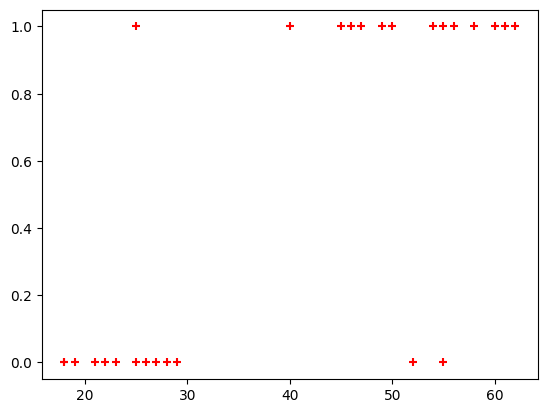

In [57]:
plt.scatter(df.age, df.bought_insurance,marker = '+',color = 'red')

In [58]:
#use train test split method
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.90, test_size = 0.10)

In [60]:
x_test

,age
9,61
4,46
18,19


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
model.predict(x_test)

array([1, 1, 0])

In [65]:
model.score(x_test,y_test)

1.0

In [66]:
model.predict_proba(x_test)

array([[0.06097261, 0.93902739],
       [0.30459392, 0.69540608],
       [0.93153491, 0.06846509]])

**Excerise**:

Download Employee retention dataset on Kaggle

1. Perform Exploratory data analysis
2. plot bar charts for employee salary impact on retention, show correlation between department and employee retention
3. Build logistic regression model using variables
4. measure the accuracy


In [67]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
df1 = pd.read_csv("/content/HR_comma_sep.csv")

In [69]:
df1.tail()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [70]:
retained=df1[df1.left==0]
retained.shape

(11428, 10)

In [71]:
left = df1[df1.left==1]
left.shape

(3571, 10)

In [72]:
df1.groupby('left').mean()

<ipython-input-72-81f7b5e4d298>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Analysis -
1. satisfaction_level	is lower in employees  who left the firm (left(1)) than people who were retained.

2. Average Monthly hours are higher for employees who left than the employees who were retained.

3. Employees who are given promotion are most likely retained at firm.

Since, department and salary are categorical features. We will plot their graph to know their impact.


<Axes: xlabel='salary'>

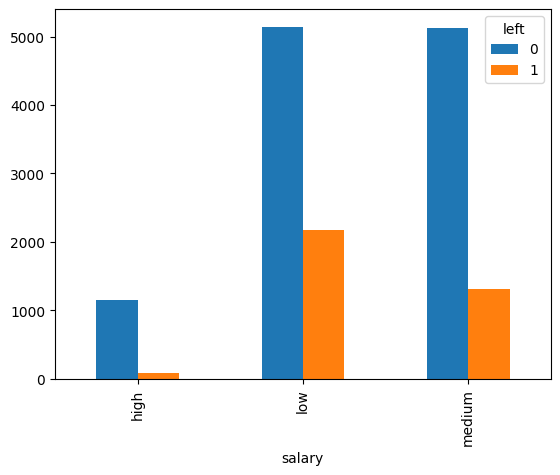

In [73]:
#impact of salary on employee retention
pd.crosstab(df1.salary, df1.left).plot(kind='bar')

From the graph, people who recieved high salary are seen to not leave the company, while people with low and medium salary range, left company with great numbers

<Axes: xlabel='Department'>

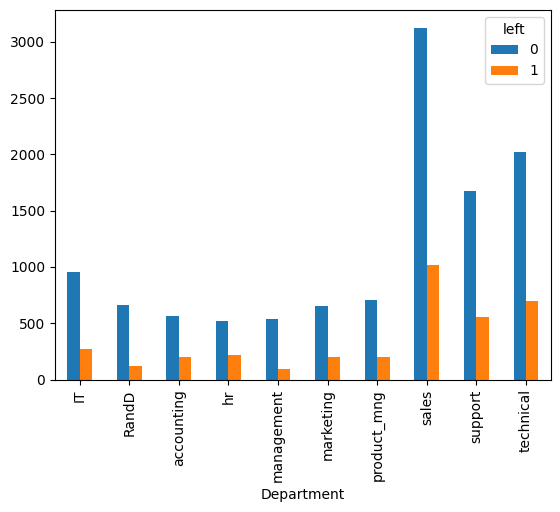

In [74]:
#Department wise employee retention rate
pd.crosstab(df1.Department, df1.left).plot(kind='bar')

Since, in the graph except for Sales department there is not much change in other departments, hence this can be ignored in our analysis.


For further analysis - we will focus on
1. Satisfaction level
2. Average monthly hours
3. Promotion for the last 5 years
4. Salary


In [75]:
subdf = df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


For categorical feature 'salary', we will treat it as a dummy variable


In [76]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = "salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [77]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [78]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [79]:
#drop salary column
df_with_dummies.drop('salary',axis = 'columns',inplace = True)
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [80]:
new_df = df_with_dummies

In [81]:
y = df1.left

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df,y,train_size=0.4)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [84]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
model.score(x_test,y_test)

0.7832222222222223